# Laboratorium 6

Przetwarzanie obrazów

Martyna Toborek 311843

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import imageio

import matplotlib.pylab as pylab

C:\Users\tynka\AppData\Local\Temp\ipykernel_19004\3457458362.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('imageio:coins.png')


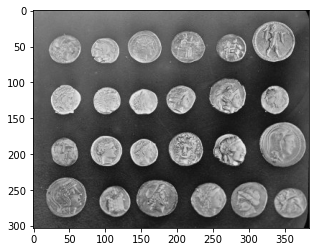

In [3]:
im = imageio.imread('imageio:coins.png')
f=plt.figure()
plt.imshow(im, cmap='gray')

In [4]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [5]:
imsize = im.shape
dct = np.zeros(imsize)

# Wykonaj DCT w bloku 8x8 na obrazku
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'Blok DCT 8x8 ')

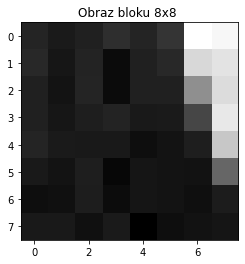

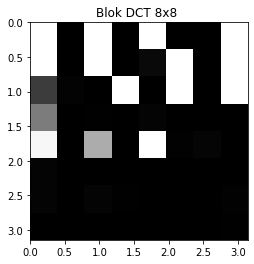

In [12]:
pos = 128

# Wyodrębnij blok z obrazu
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "Obraz bloku 8x8 ")

# Wyświetl DCT tego obrazu
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "Blok DCT 8x8 ")

Text(0.5, 1.0, '8x8 DCT obrazu')

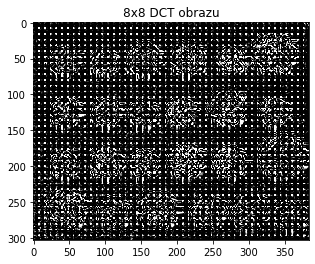

In [14]:
# Wyświetl cały DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCT obrazu")

Zachowanie 14.926258% współczynników DCT


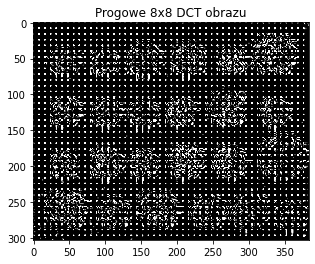

In [21]:
# Próg
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Progowe 8x8 DCT obrazu")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Zachowanie %f%% współczynników DCT" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'Porównanieobrazu oryginalnego oraz skompresowanego DCT')

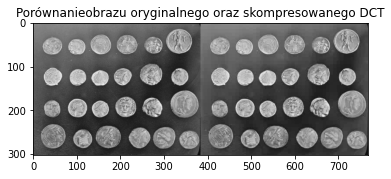

In [16]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Porównanieobrazu oryginalnego oraz skompresowanego DCT" )

Zachowanie 14.926258% współczynnikó DCT
Zachowanie 16.614240% współczynników DFT


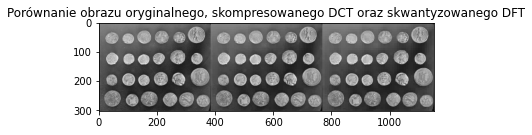

In [23]:
dft = zeros(imsize,dtype='complex')
im_dft = zeros(imsize,dtype='complex')

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# Próg
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Zachowanie %f%% współczynnikó DCT" % (percent_nonzeros*100.0))
print ("Zachowanie %f%% współczynników DFT" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.title("Porównanie obrazu oryginalnego, skompresowanego DCT oraz skwantyzowanego DFT" )
plt.imshow( np.hstack( (im, im_dct, abs(im_dft)) ) ,cmap='gray')


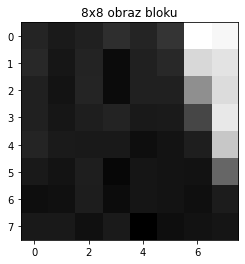

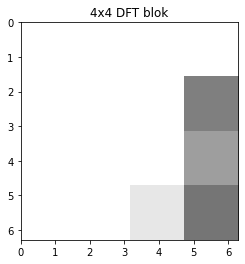

In [24]:
pos = 128

# Wyodrębnij blok z obrazu
plt.figure()
plt.title( "8x8 obraz bloku")
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')

# Wyświetl DCT tego bloku
plt.figure()
plt.title( "4x4 DFT blok")
plt.imshow(abs(dft[pos:pos+4,pos:pos+4]),cmap='gray',vmax= np.max(abs(dft))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0])